In [26]:
import subprocess
import matplotlib.pyplot as plt
import os
from constants import OPENAI_API_KEY, BITWIDTH
from parse_functions import get_pareto_points, get_points

Генерируем все возможные деревья

In [29]:
folders = [f'bitwidth_{BITWIDTH}', f'bitwidth_{BITWIDTH}_output']

for folder in folders:
    if os.path.exists(folder):
        subprocess.run(f"rm -rf {folder}", shell=True, check=True)

In [30]:
subprocess.run(["python3", "0_generate_prefix_trees_code.py"], check=True)

bitwidth 4, number of matrices 8
7


CompletedProcess(args=['python3', '0_generate_prefix_trees_code.py'], returncode=0)

Проверяем их

In [31]:
subprocess.run(["python3", "1_check_input_files.py"], check=True)

bitwidth_2
Correct all 0 files
bitwidth_3
Correct all 0 files
bitwidth_4
Correct all 7 files
bitwidth_5
Correct all 0 files
bitwidth_6
Correct all 0 files


CompletedProcess(args=['python3', '1_check_input_files.py'], returncode=0)

Генерируем параметры

In [32]:
subprocess.run(["python3", "2_generate_params.py"], check=True)

(16, 2)


CompletedProcess(args=['python3', '2_generate_params.py'], returncode=0)

Запускаем синтез

In [33]:
subprocess.run(["yosys", "3_run_synthesis.tcl"], check=True)

bitwidth_4/prefix_1.v

 /----------------------------------------------------------------------------\
 |                                                                            |
 |  yosys -- Yosys Open SYnthesis Suite                                       |
 |                                                                            |
 |  Copyright (C) 2012 - 2020  Claire Xenia Wolf <claire@yosyshq.com>         |
 |                                                                            |
 |  Permission to use, copy, modify, and/or distribute this software for any  |
 |  purpose with or without fee is hereby granted, provided that the above    |
 |  copyright notice and this permission notice appear in all copies.         |
 |                                                                            |
 |  THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES  |
 |  WITH REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF          |
 |  MERCHANTABILI

CompletedProcess(args=['yosys', '3_run_synthesis.tcl'], returncode=0)

Получаем значения площади и задержки

In [34]:
subprocess.run(["python3", "4_get_delay_sta.py"], check=True)

OpenSTA 2.6.0 a34588e2c5 Copyright (c) 2025, Parallax Software, Inc.
License GPLv3: GNU GPL version 3 <http://gnu.org/licenses/gpl.html>

This is free software, and you are free to change and redistribute it
under certain conditions; type `show_copying' for details. 
This program comes with ABSOLUTELY NO WARRANTY; for details type `show_warranty'.
OpenSTA 2.6.0 a34588e2c5 Copyright (c) 2025, Parallax Software, Inc.
License GPLv3: GNU GPL version 3 <http://gnu.org/licenses/gpl.html>

This is free software, and you are free to change and redistribute it
under certain conditions; type `show_copying' for details. 
This program comes with ABSOLUTELY NO WARRANTY; for details type `show_warranty'.
OpenSTA 2.6.0 a34588e2c5 Copyright (c) 2025, Parallax Software, Inc.
License GPLv3: GNU GPL version 3 <http://gnu.org/licenses/gpl.html>

This is free software, and you are free to change and redistribute it
under certain conditions; type `show_copying' for details. 
This program comes with ABSOLUTE

CompletedProcess(args=['python3', '4_get_delay_sta.py'], returncode=0)

Строим графики

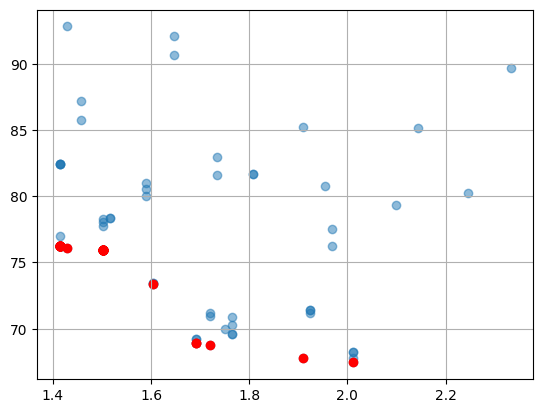

In [35]:
res_dir = f'bitwidth_{BITWIDTH}_output'
df = get_points(res_dir)

pareto_front = get_pareto_points(df)

plt.scatter(df.area, df.delay, alpha=0.5)
plt.scatter(pareto_front.area, pareto_front.delay, c='r')
plt.grid()

Очищаем папки и запускаем LLM-генератор

In [36]:
subprocess.run(f'rm -rf bitwidth_{BITWIDTH}/* bitwidth_{BITWIDTH}_output/*', shell=True, check=True)

CompletedProcess(args='rm -rf bitwidth_4/* bitwidth_4_output/*', returncode=0)

In [37]:
subprocess.run(["python3", "llm_generator.py"], check=True)


Iteration 1
Lacking bit ranges: [(0, 1), (0, 2), (0, 3)]
Sending request to LLM...
LLM response:
4: connectedNodes=(0, 1), range=[0:1], left_bound=0, right_bound=1.
5: connectedNodes=(4, 2), range=[0:2], left_bound=0, right_bound=2.
6: connectedNodes=(5, 3), range=[0:3], left_bound=0, right_bound=3.
New nodes received: 3

Iteration 2
SPCR is valid, synthesis completed.


CompletedProcess(args=['python3', 'llm_generator.py'], returncode=0)

Проверяем структур

In [38]:
subprocess.run(["python3", "1_check_input_files.py"], check=True)

bitwidth_2
Correct all 0 files
bitwidth_3
Correct all 0 files
bitwidth_4
Correct all 1 files
bitwidth_5
Correct all 0 files
bitwidth_6
Correct all 0 files


CompletedProcess(args=['python3', '1_check_input_files.py'], returncode=0)

Запускаем синтез

In [39]:
subprocess.run(["yosys", "3_run_synthesis.tcl"], check=True)

bitwidth_4/llm_adder_4.v

 /----------------------------------------------------------------------------\
 |                                                                            |
 |  yosys -- Yosys Open SYnthesis Suite                                       |
 |                                                                            |
 |  Copyright (C) 2012 - 2020  Claire Xenia Wolf <claire@yosyshq.com>         |
 |                                                                            |
 |  Permission to use, copy, modify, and/or distribute this software for any  |
 |  purpose with or without fee is hereby granted, provided that the above    |
 |  copyright notice and this permission notice appear in all copies.         |
 |                                                                            |
 |  THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES  |
 |  WITH REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF          |
 |  MERCHANTAB

CompletedProcess(args=['yosys', '3_run_synthesis.tcl'], returncode=0)

Получаем площадь и задержку

In [40]:
subprocess.run(["python3", "4_get_delay_sta.py"], check=True)

OpenSTA 2.6.0 a34588e2c5 Copyright (c) 2025, Parallax Software, Inc.
License GPLv3: GNU GPL version 3 <http://gnu.org/licenses/gpl.html>

This is free software, and you are free to change and redistribute it
under certain conditions; type `show_copying' for details. 
This program comes with ABSOLUTELY NO WARRANTY; for details type `show_warranty'.
OpenSTA 2.6.0 a34588e2c5 Copyright (c) 2025, Parallax Software, Inc.
License GPLv3: GNU GPL version 3 <http://gnu.org/licenses/gpl.html>

This is free software, and you are free to change and redistribute it
under certain conditions; type `show_copying' for details. 
This program comes with ABSOLUTELY NO WARRANTY; for details type `show_warranty'.
OpenSTA 2.6.0 a34588e2c5 Copyright (c) 2025, Parallax Software, Inc.
License GPLv3: GNU GPL version 3 <http://gnu.org/licenses/gpl.html>

This is free software, and you are free to change and redistribute it
under certain conditions; type `show_copying' for details. 
This program comes with ABSOLUTE

CompletedProcess(args=['python3', '4_get_delay_sta.py'], returncode=0)

Строим графики (красные точки - Парето-Фронт для LLM-сумматора, зеленые - для прошлых)

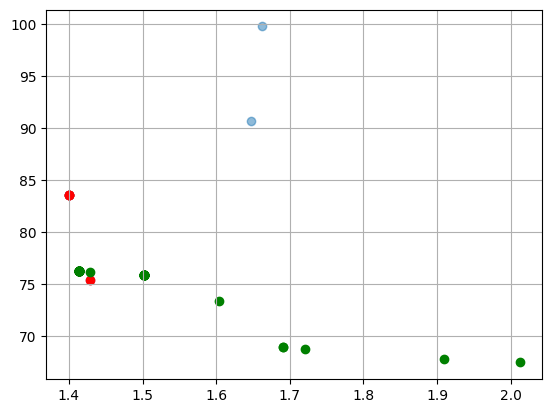

In [41]:
res_dir = f'bitwidth_{BITWIDTH}_output'
df_llm = get_points(res_dir)

pareto_front_llm = get_pareto_points(df_llm)

plt.scatter(df_llm.area, df_llm.delay, alpha=0.5)
plt.scatter(pareto_front_llm.area, pareto_front_llm.delay, c='r')
plt.scatter(pareto_front.area, pareto_front.delay, c='g')
plt.grid()